# Esercitazione 8

# Esercizi 08.1 e 08.2

L'obiettivo principale di questo esercizio era quello di calcolare, mediante l'algoritmo del Variational Monte Carlo, il ground state di una particella quantistica 1D confinata nel seguente potenziale esterno:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Per farlo siamo abbiamo ottimizzato i parametri $\mu$ e $\sigma$ della funzione di prova: 

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

In particolare, il codice sfrutta l'algoritmo di Metropolis per fare sampling di $|\Psi_T(x)|^2$, utilizzando la una distribuzione uniforme come probabilità di transizione $T(x_{new}|x_{old})$ . La quantità che abbiamo dovuto minimizzare per ottimizzare i parametri è, ovviamente, il valor medio dell'hamiltoniana del sistema nello stato quantistico sopra specificato. Mostro quindi, di seguito, l'andamento di $\langle {H} \rangle$ </span> e la sua incertezza in funzione del numero di blocchi per i parametri che minimizzano tale grandezza.

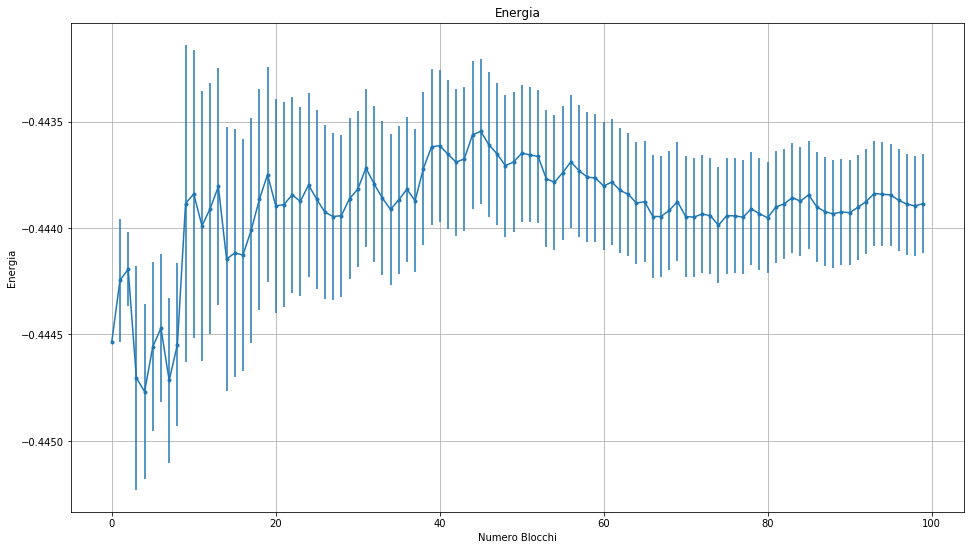

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,9]

k=np.loadtxt("Esercizio08.1/energia.txt", delimiter="   ")
x=k[:,0]
y=k[:,1]
err=k[:,2]

plt.errorbar(x,y,yerr=err, marker=".")
plt.title("Energia")
plt.xlabel("Numero Blocchi")
plt.ylabel("Energia")
plt.grid()
plt.show()

Di seguito mostro inoltre un istogramma contenente i punti estratti dalla distribuzione $|\Psi_T(x)|^2$, confrontando poi i risultati ottenuti dal codice Monte Carlo con la curva analitica e con la funzione d'onda di prova (sostituendo ora i parametri ottimizzati). Gli errori, ancora una volta, sono ottenuti mediante data blocking.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

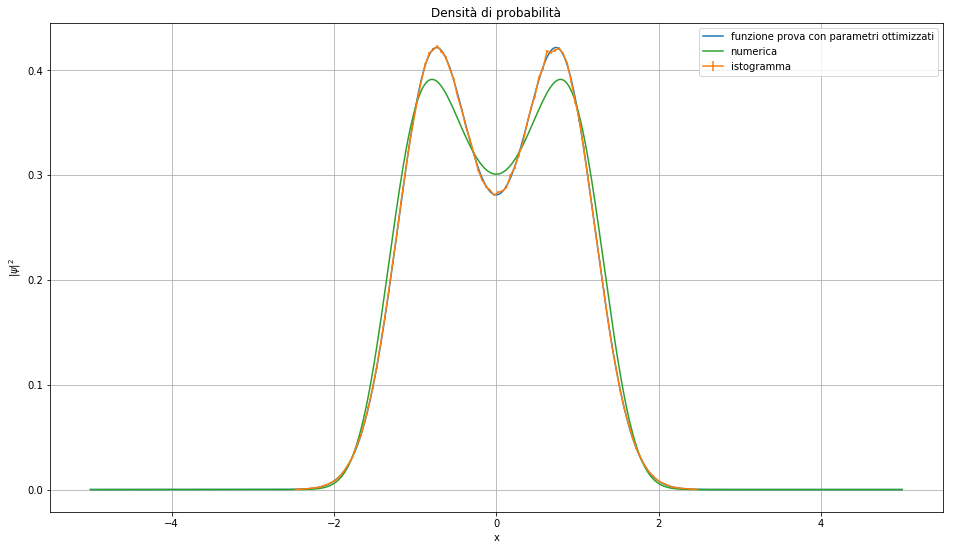

In [12]:
mu = 0.80
sigma = 0.61
#funzione prova con parametri ottimizzati e opportunamente normalizzata
psi2 = 1/2.54962 * (np.exp(-(x-mu)**2/(2*sigma**2))+np.exp(-(x+mu)**2/(2*sigma**2)))**2
plt.plot(x,psi2,label='funzione prova con parametri ottimizzati')

block, I, error = np.loadtxt("Esercizio08.1/istogramma.txt",usecols=(0,1,2), delimiter="   ", unpack='true')
plt.errorbar(block,I,yerr=error,label="istogramma")
plt.title("Densità di probabilità")
plt.xlabel("x")
plt.ylabel(r"$\vert\psi\vert^2$")
plt.grid(1)
plt.plot(x,(psi[0])**2,label='numerica')
plt.legend()
plt.show()

# Esercizio 08.3

In questo esercizio abbiamo confrontato gli istrogrammi ottenuti tramite il codice VMC con quelli ottenuti tramite il codice PIMS/PIGS.

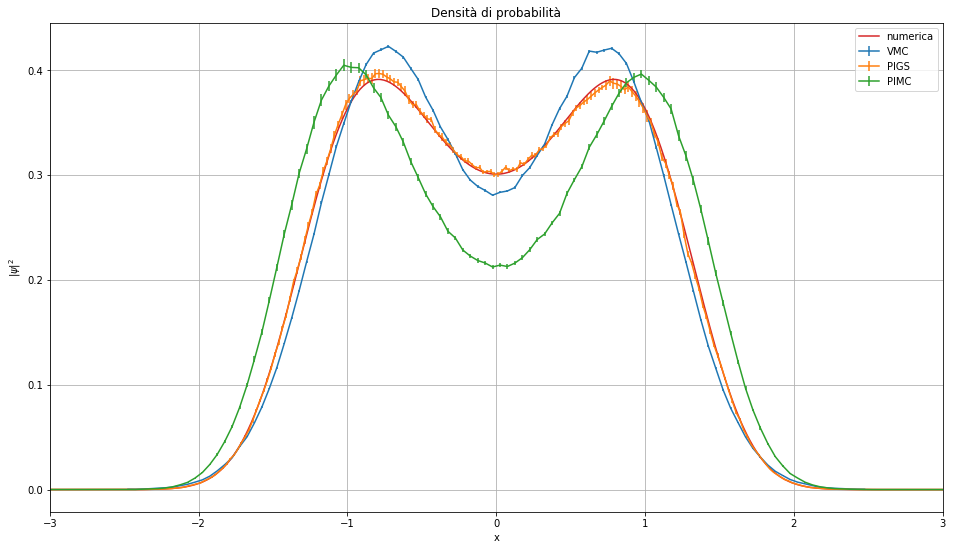

In [15]:
block1, I1, error1 = np.loadtxt("Esercizio08.3/VMC/istogramma.txt",usecols=(0,1,2), delimiter="   ", unpack='true')
plt.errorbar(block1,I1,yerr=error1,label="VMC")
block2, I2, error2 = np.loadtxt("Esercizio08.3/PIGS/probability.dat",usecols=(0,1,2), delimiter=" ", unpack='true')
plt.errorbar(block2,I2,yerr=error2,label="PIGS")
block3, I3, error3 = np.loadtxt("Esercizio08.3/PIMC/probability.dat",usecols=(0,1,2), delimiter=" ", unpack='true')
plt.errorbar(block3,I3,yerr=error3,label="PIMC")
plt.title("Densità di probabilità")
plt.xlabel("x")
plt.ylabel(r'$\vert\psi\vert^2$')
plt.grid(1)
plt.xlim((-3,3))
plt.plot(x,(psi[0])**2,label='numerica')
plt.legend()
plt.show()

Si ricorda che nel PIGS la simulazione è fatta a temperatura finita, pertanto il sistema può accedere termicamente a stati eccitati e quindi lo stato è misto.